# console : mlflow ui
# Acc√®s console MLFlow : http://127.0.0.1:5000
# 1 - Chargement & configuration - 18 sec

In [1]:
import sys
import os
sys.path.append('../src')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from requirements import *
from src import data_preprocessing as dp
from src import model_training as mt
from src import evaluate as ev
from src import utils

import mlflow
mlflow.set_experiment("Sentiment Analysis Project")

c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




‚úÖ Toutes les librairies sont pr√©sentes et pr√™tes √† √™tre utilis√©es !



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Traceback (most recent call last):
  File "c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\mlflow\store\tracking\file_store.py", line 329, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\mlflow\store\tracking\file_store.py", line 427, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir

<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/906586012259731436', creation_time=1742576058928, experiment_id='906586012259731436', last_update_time=1742576058928, lifecycle_stage='active', name='Sentiment Analysis Project', tags={}>

## 1.1 - D√©marrage automatique du serveur MLflow (Backend SQLite + Artifact Store local)

In [2]:
utils.start_mlflow_server(port = 5000)
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("projet analyse sentiments")

üöÄ D√©marrage du serveur MLflow (SQLite backend)...
‚úÖ MLflow UI disponible sur : http://127.0.0.1:5000


<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/3', creation_time=1742808098078, experiment_id='3', last_update_time=1742808098078, lifecycle_stage='active', name='projet analyse sentiments', tags={}>

## 1.2 - Affichage de la structure dossier

In [3]:
utils.afficher_structure_dossier("..", max_niveaux = 2)

‚îú‚îÄ‚îÄ .coverage
‚îú‚îÄ‚îÄ .dockerignore
‚îú‚îÄ‚îÄ .env
‚îú‚îÄ‚îÄ .git
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ COMMIT_EDITMSG
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ FETCH_HEAD
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ HEAD
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ config
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ description
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ hooks
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ applypatch-msg.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ commit-msg.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ fsmonitor-watchman.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ post-update.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-applypatch.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-commit.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-merge-commit.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-push.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-rebase.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-receive.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ prepare-commit-msg.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ push-to-checkout.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ sendemail-validate.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îî‚îÄ‚îÄ update.sample
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ index
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ info
‚îÇ   ‚îú‚îÄ‚îÄ ‚îî‚îÄ‚îÄ exclude
‚îú‚îÄ‚îÄ

## 1.3 - Chargement des donn√©es

In [4]:
print(f"üìÇ R√©pertoire courant : {os.getcwd()}")

üìÇ R√©pertoire courant : c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\notebooks


In [5]:
data_path = "../data/tweets.csv"
if os.path.exists(data_path):
    tweets = pd.read_csv(data_path, encoding = "ISO-8859-1")
    print("‚úÖ Dataset charg√© avec succ√®s !")
else:
    print("‚ùå Le fichier tweets.csv est introuvable.")

‚úÖ Dataset charg√© avec succ√®s !


# 2 - Exploration & nettoyage
## 2.1 - Nettoyage initial

In [6]:
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [7]:
# Renommage des colonnes
tweets.columns = ["label", "id", "date", "query", "user", "text"]

In [8]:
# Suppression des colonnes inutiles
tweets = tweets.drop(columns=["id", "date", "query", "user"])

In [9]:
# Conversion des labels (0 et 4 ‚Üí 0 et 1)
tweets['label'] = tweets['label'].map({0: 0, 4: 1})

## 2.2 - Suppression des doublons sur la colonne "text"

In [10]:
before = len(tweets)
tweets = tweets.drop_duplicates(subset = ["text"], keep = "first").reset_index(drop = True)
after = len(tweets)
print(f"‚úÖ Suppression des doublons effectu√©e : {before - after} doublons supprim√©s.")
tweets = tweets.reset_index(drop = True)

‚úÖ Suppression des doublons effectu√©e : 18534 doublons supprim√©s.


## 2.3 - Nettoyage avanc√©

In [11]:
tweets_cleaned = dp.preprocess_tweets_parallel(tweets)

‚úÖ Chargement des tweets nettoy√©s depuis ../models_saved/cleaned_tweets.pkl


# 3 - Vader scoring

In [12]:
vader_scores = dp.compute_vader_scores(tweets_cleaned)

üöÄ Nouveau run d√©marr√© : 6f6e6cba280d4da29cdf9843d87340a0
‚úÖ Scores VADER charg√©s depuis ../models_saved/vader_scores.pkl...

üìä Rapport de classification VADER :
              precision    recall  f1-score   support

           0       0.81      0.43      0.56    790184
           1       0.61      0.90      0.73    791281

    accuracy                           0.67   1581465
   macro avg       0.71      0.67      0.65   1581465
weighted avg       0.71      0.67      0.65   1581465

üèÉ View run rare-cat-215 at: http://127.0.0.1:5000/#/experiments/2/runs/6f6e6cba280d4da29cdf9843d87340a0
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 4 - Vectorisation des tweets

In [13]:
sample_size = 15000  # Taille √©chantillon USE (modifiable)

tweets_sampled = tweets_cleaned.sample(n = sample_size, random_state = 70).reset_index(drop = True)

X_bow, X_tfidf, X_fasttext, X_use, y_use = dp.vectorize_and_save(
    tweets_cleaned['text'], tweets_sampled['text'],
    tweets_cleaned['label'], tweets_sampled['label'],
    force_revectorize = False
)

üöÄ Nouveau run d√©marr√© : ca02159bb115427cbff74182ceabf718
üìÇ Chargement des matrices vectoris√©es existantes...
üèÉ View run adorable-seal-699 at: http://127.0.0.1:5000/#/experiments/2/runs/ca02159bb115427cbff74182ceabf718
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


## 4.1 - Chargement intelligent des donn√©es nettoy√©es et embeddings FastText vectoris√©s
### 4.1.1 - Chemin vers les fichiers existants

In [14]:
path_fasttext = "../models_saved/X_fasttext.pkl"
path_cleaned = "../models_saved/cleaned_tweets.pkl"

### 4.1.2 - Chargement des fichiers, s'ils existent, sinon, delance du pipeline complet

In [15]:
if os.path.exists(path_fasttext) and os.path.exists(path_cleaned):
    print("‚úÖ Chargement des fichiers pr√©trait√©s :")
    X_fasttext = joblib.load(path_fasttext)
    tweets_cleaned = pd.read_pickle(path_cleaned)
else:
    print("üîÑ Fichiers non trouv√©s. Ex√©cution du pr√©traitement complet...")
    
    # Nettoyage des tweets
    tweets_cleaned = dp.preprocess_tweets_parallel(tweets_df, filename=path_cleaned)
    
    # Vectorisation FastText uniquement
    _, _, X_fasttext, _ = dp.vectorize_and_save(
        X_text_full=tweets_cleaned['text'], 
        X_text_reduced=tweets_cleaned['text'], 
        fasttext_file=path_fasttext
    )

‚úÖ Chargement des fichiers pr√©trait√©s :


# 5 - Mod√©lisation Classique (TF-IDF + R√©gression Logistique) - 2 min 08

In [16]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_tfidf, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify=tweets_cleaned['label']
)
log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train)
# log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train, force_retrain = True)

üöÄ Nouveau run d√©marr√© : 8b00b141945f4e8e83ecac0b8616c9e2
‚úÖ Mod√®le R√©gression Logistique d√©j√† existant. Chargement...
üèÉ View run caring-flea-682 at: http://127.0.0.1:5000/#/experiments/2/runs/8b00b141945f4e8e83ecac0b8616c9e2
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 6 - Mod√®les Avanc√©s (Random Forest / LightGBM / LSTM)
## 6.1 - FastText supervis√©

In [17]:
mt.train_fasttext_supervised()
# mt.train_fasttext_supervised(force_retrain = True)

üöÄ Nouveau run d√©marr√© : 5f5573b4ef6e42e68c1d1d8bff084d02
‚úÖ Mod√®le FastText supervis√© existant. Chargement...
üèÉ View run intrigued-shrimp-339 at: http://127.0.0.1:5000/#/experiments/2/runs/5f5573b4ef6e42e68c1d1d8bff084d02
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


## 6.1 - FastText + Random Forest - 4 min 51

In [18]:
X_ft_train, X_ft_test, y_train, y_test = train_test_split(
    X_fasttext, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify = tweets_cleaned['label']
)
rf_model = mt.train_random_forest(X_ft_train, y_train)
# rf_model = mt.train_random_forest(X_ft_train, y_train, force_retrain = True)

üöÄ Nouveau run d√©marr√© : 84306dc157c44a6089062c040714f930
‚úÖ Mod√®le RandomForest d√©j√† existant. Chargement...
üèÉ View run suave-fly-271 at: http://127.0.0.1:5000/#/experiments/2/runs/84306dc157c44a6089062c040714f930
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


## 6.2 - FastText + LSTM - 7 min 44
### 6.2.1 - Entra√Ænements du mod√®le


üé¨ Entra√Ænement LSTM - Config 1 : {'lstm_units': 64, 'dropout_rate': 0.5, 'dense_units': 32, 'batch_size': 128, 'epochs': 10}
üöÄ Nouveau run d√©marr√© : caba9ae6229a4910b8df13e85a2ce440


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


üöÄ Entra√Ænement en cours...
Epoch 1/10
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 2ms/step - accuracy: 0.7467 - loss: 0.5144 - val_accuracy: 0.7574 - val_loss: 0.4962
Epoch 2/10
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 2ms/step - accuracy: 0.7590 - loss: 0.4953 - val_accuracy: 0.7636 - val_loss: 0.4868
Epoch 3/10
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 2ms/step - accuracy: 0.7628 - loss: 0.4883 - val_accuracy: 0.7664 - val_loss: 0.4816
Epoch 4/10
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 2ms/step - accuracy: 0.7651 - loss: 0.4845 - val_accuracy: 0.7676 - val_loss: 0.4788
Epoch 5/10
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 2ms/step - accuracy: 0.7664 - loss: 0.4815 - val_accuracy: 0.7693 - val_loss: 0.4761
Epoch 6/10
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 2ms/step - accuracy: 0.7684 

2025/04/04 10:13:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 10:13:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 10:13:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 11
Created version '11' of model 'sentiment_model_lstm'.


9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 869us/step
üèÉ View run LSTM_64u_128bs_10ep at: http://127.0.0.1:5000/#/experiments/2/runs/caba9ae6229a4910b8df13e85a2ce440
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : 75148ecbdc4f4b79b78ec25e3dfd12df

‚è±Ô∏è [LSTM] - Fin : 259.41 sec | CPU: 9.9% | RAM: 47.1%
üèÉ View run handsome-mole-822 at: http://127.0.0.1:5000/#/experiments/2/runs/75148ecbdc4f4b79b78ec25e3dfd12df
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Run termin√©.
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 783us/step

üé¨ Entra√Ænement LSTM - Config 2 : {'lstm_units': 128, 'dropout_rate': 0.3, 'dense_units': 64, 'batch_size': 256, 'epochs': 15}
üöÄ Nouveau run d√©marr√© : e73b1c8e93c14d4d97ef38d79faf6850


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


üöÄ Entra√Ænement en cours...
Epoch 1/15
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 7ms/step - accuracy: 0.7473 - loss: 0.5128 - val_accuracy: 0.7598 - val_loss: 0.4927
Epoch 2/15
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 6ms/step - accuracy: 0.7611 - loss: 0.4911 - val_accuracy: 0.7631 - val_loss: 0.4868
Epoch 3/15
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 7ms/step - accuracy: 0.7651 - loss: 0.4841 - val_accuracy: 0.7669 - val_loss: 0.4809
Epoch 4/15
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 6ms/step - accuracy: 0.7685 - loss: 0.4789 - val_accuracy: 0.7690 - val_loss: 0.4768
Epoch 5/15
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 8ms/step - accuracy: 0.7704 - loss: 0.4761 - val_accuracy: 0.7705 - val_loss: 0.4742
Epoch 6/15
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 8ms/step - accuracy: 0.7713 

2025/04/04 10:22:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 10:22:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 10:22:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 12
Created version '12' of model 'sentiment_model_lstm'.


9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 1ms/step
üèÉ View run LSTM_128u_256bs_15ep at: http://127.0.0.1:5000/#/experiments/2/runs/e73b1c8e93c14d4d97ef38d79faf6850
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : a26f7817f7724014adff162e6a2ef0b0

‚è±Ô∏è [LSTM] - Fin : 519.27 sec | CPU: 14.2% | RAM: 48.7%
üèÉ View run nimble-doe-80 at: http://127.0.0.1:5000/#/experiments/2/runs/a26f7817f7724014adff162e6a2ef0b0
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Run termin√©.
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 935us/step

üé¨ Entra√Ænement LSTM - Config 3 : {'lstm_units': 256, 'dropout_rate': 0.4, 'dense_units': 64, 'batch_size': 64, 'epochs': 8}
üöÄ Nouveau run d√©marr√© : 6dbbd557b47a49cd896c6b435cad57e8


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


üöÄ Entra√Ænement en cours...
Epoch 1/8
19769/19769 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 173s 9ms/step - accuracy: 0.7503 - loss: 0.5075 - val_accuracy: 0.7624 - val_loss: 0.4874
Epoch 2/8
19769/19769 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 160s 8ms/step - accuracy: 0.7628 - loss: 0.4877 - val_accuracy: 0.7673 - val_loss: 0.4797
Epoch 3/8
19769/19769 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154s 8ms/step - accuracy: 0.7672 - loss: 0.4804 - val_accuracy: 0.7695 - val_loss: 0.4756
Epoch 4/8
19769/19769 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 160s 8ms/step - accuracy: 0.7698 - loss: 0.4757 - val_accuracy: 0.7721 - val_loss: 0.4721
Epoch 5/8
19769/19769 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 161s 8ms/step - accuracy: 0.7720 - loss: 0.4715 - val_accuracy: 0.7738 - val_loss: 0.4694
Epoch 6/8
19769/19769 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 146s 7ms/step - accur

2025/04/04 10:43:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/04/04 10:43:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lstm' already exists. Creating a new version of this model...
2025/04/04 10:43:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lstm, version 13
Created version '13' of model 'sentiment_model_lstm'.


9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 1ms/step
üèÉ View run LSTM_256u_64bs_8ep at: http://127.0.0.1:5000/#/experiments/2/runs/6dbbd557b47a49cd896c6b435cad57e8
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : c6e7b6844416430587be5adcf2fbb5bb

‚è±Ô∏è [LSTM] - Fin : 1267.97 sec | CPU: 8.0% | RAM: 49.1%
üèÉ View run intelligent-hawk-389 at: http://127.0.0.1:5000/#/experiments/2/runs/c6e7b6844416430587be5adcf2fbb5bb
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Run termin√©.
9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 1ms/step

‚è±Ô∏è Entra√Ænements termin√©s en 2089.05 secondes


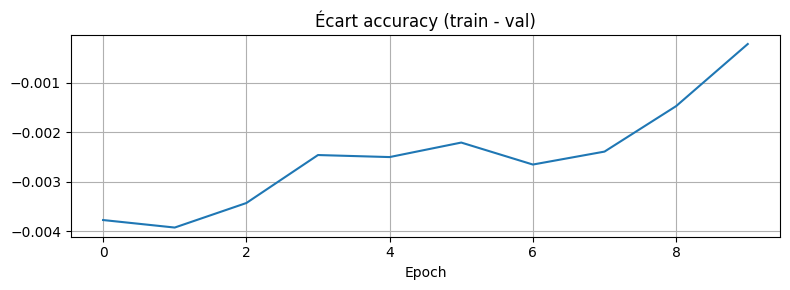

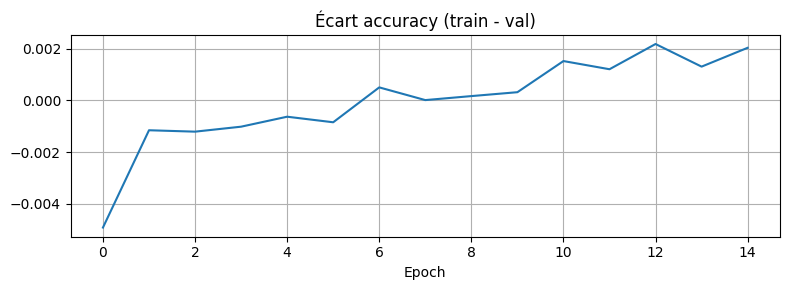

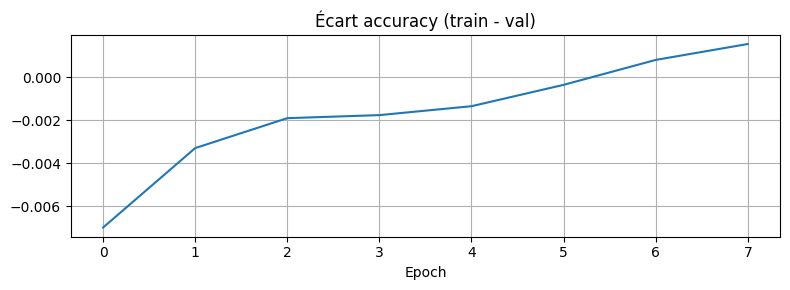

In [19]:
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'])
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'], force_retrain = True)
import time
start_total = time.time()
# Liste des combinaisons d'hyperparam√®tres √† tester

lstm_experiments = [
    {"lstm_units": 64, "dropout_rate": 0.5, "dense_units": 32, "batch_size": 128, "epochs": 10},
    {"lstm_units": 128, "dropout_rate": 0.3, "dense_units": 64, "batch_size": 256, "epochs": 15},
    {"lstm_units": 256, "dropout_rate": 0.4, "dense_units": 64, "batch_size": 64,  "epochs": 8},
]

# Stockage des r√©sultats
results_lstm = []

for i, params in enumerate(lstm_experiments, 1):
    print(f"\nüé¨ Entra√Ænement LSTM - Config {i} : {params}")
    
    # Appel unique de la fonction, compatible avec ton style habituel
    lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(
        X_embeddings = X_fasttext,
        y_labels=tweets_cleaned['label'],
        force_retrain = True,
        **params
    )
    
    y_pred_lstm = (lstm_model.predict(X_ft_test_reshaped) > 0.5).astype(int).flatten()
    acc = accuracy_score(y_ft_test, y_pred_lstm)
    f1 = f1_score(y_ft_test, y_pred_lstm)

    results_lstm.append({
        "config_id": f"config_{i}",
        **params,
        "accuracy": round(acc, 4),
        "f1_score": round(f1, 4),
        "history": history.history
    })
print(f"\n‚è±Ô∏è Entra√Ænements termin√©s en {round(time.time() - start_total, 2)} secondes")

### 6.2.2 - Tableau des r√©sultats comparatifs

In [20]:
df_lstm_results = pd.DataFrame(results_lstm)
display(df_lstm_results)

config_id  lstm_units  dropout_rate  dense_units  batch_size  epochs  \
0  config_1          64           0.5           32         128      10   
1  config_2         128           0.3           64         256      15   
2  config_3         256           0.4           64          64       8   

   accuracy  f1_score                                            history  
0    0.7726    0.7716  {'accuracy': [0.7536682486534119, 0.7596785426...  
1    0.7780    0.7801  {'accuracy': [0.7548617720603943, 0.7619272470...  
2    0.7753    0.7720  {'accuracy': [0.7553724050521851, 0.7639609575...

In [21]:
best_lstm = df_lstm_results.sort_values("f1_score", ascending=False).iloc[0]
print("üèÜ Meilleure configuration LSTM :")
display(best_lstm)

üèÜ Meilleure configuration LSTM :


config_id                                                config_2
lstm_units                                                    128
dropout_rate                                                  0.3
dense_units                                                    64
batch_size                                                    256
epochs                                                         15
accuracy                                                    0.778
f1_score                                                   0.7801
history         {'accuracy': [0.7548617720603943, 0.7619272470...
Name: 1, dtype: object

### 6.2.3 - Affichage des courbes d'apprentissage pour chaque run


üìâ Courbes d'entra√Ænement pour config_1 | Params: {'lstm_units': 64, 'dropout_rate': 0.5, 'batch_size': 128, 'epochs': 10}


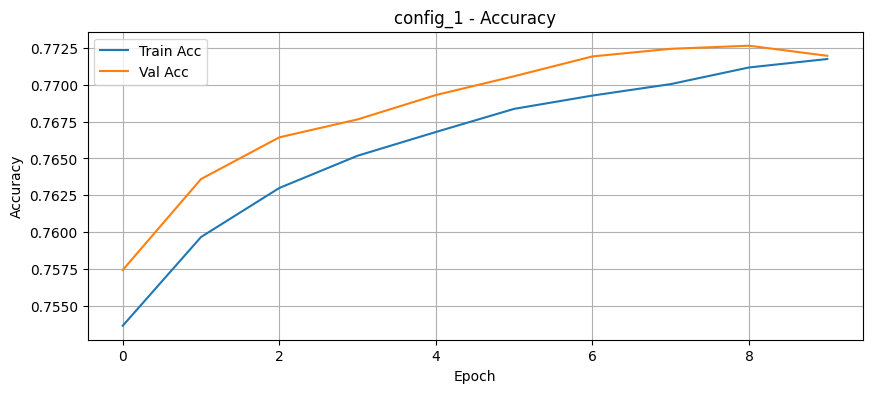

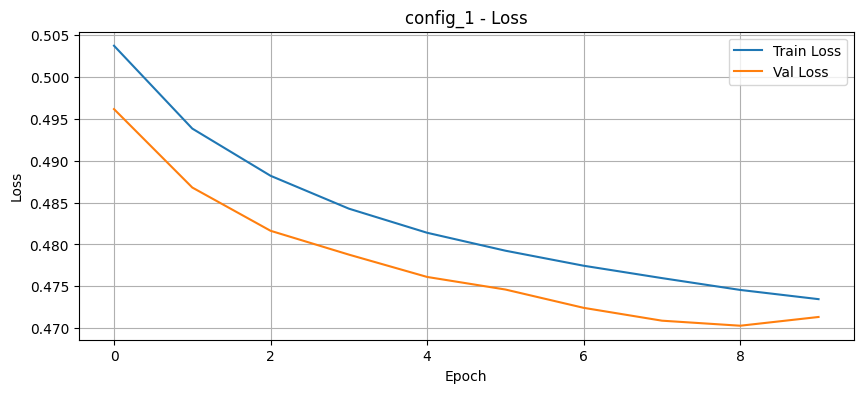


üìâ Courbes d'entra√Ænement pour config_2 | Params: {'lstm_units': 128, 'dropout_rate': 0.3, 'batch_size': 256, 'epochs': 15}


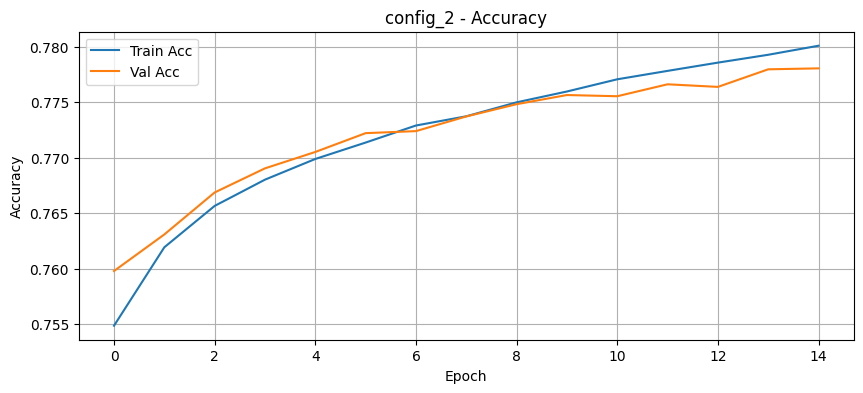

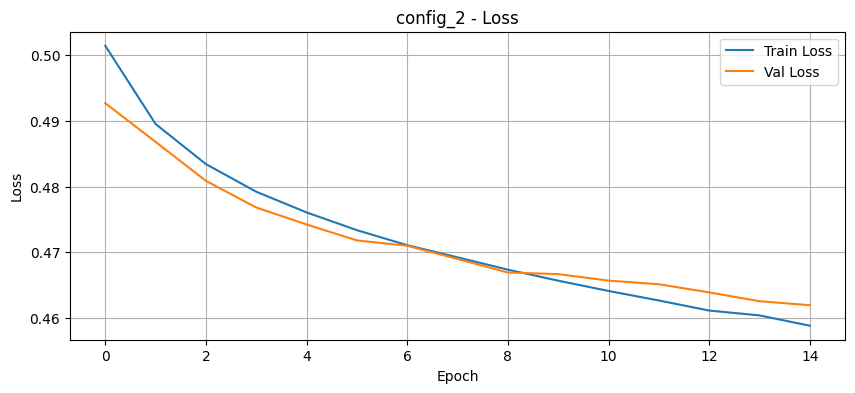


üìâ Courbes d'entra√Ænement pour config_3 | Params: {'lstm_units': 256, 'dropout_rate': 0.4, 'batch_size': 64, 'epochs': 8}


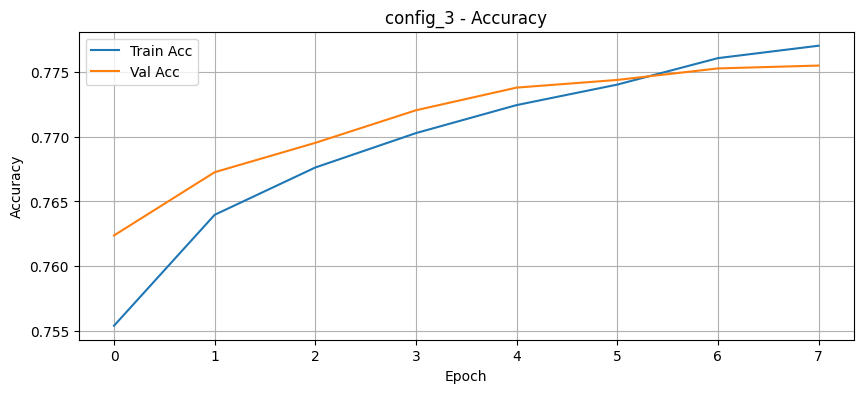

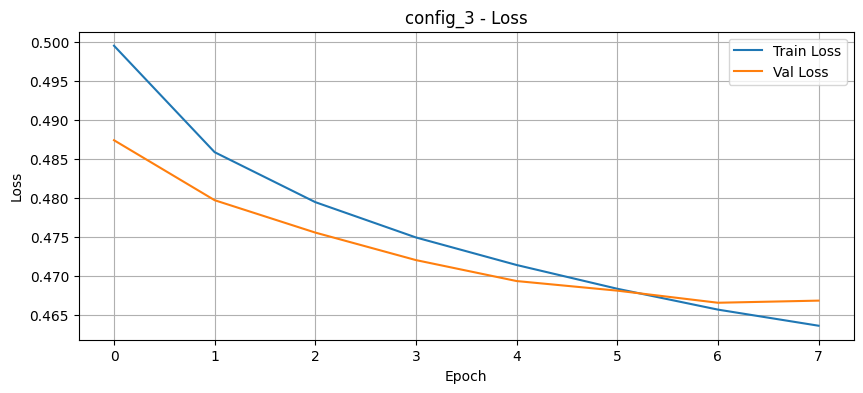

In [22]:
for i, result in enumerate(results_lstm):
    config_id = result["config_id"]
    params = {k: result[k] for k in ["lstm_units", "dropout_rate", "batch_size", "epochs"]}

    # Recharge le mod√®le pour r√©cup√©rer l'historique associ√©
    print(f"\nüìâ Courbes d'entra√Ænement pour {config_id} | Params: {params}")

    # Si tu veux sauvegarder les historiques dans results_lstm, tu dois d'abord stocker `history.history` dans la boucle plus haut :
    # result["history"] = history.history

    hist = result.get("history")

    if hist is not None:
        # Accuracy
        plt.figure(figsize=(10, 4))
        plt.plot(hist['accuracy'], label='Train Acc')
        plt.plot(hist['val_accuracy'], label='Val Acc')
        plt.title(f"{config_id} - Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Loss
        plt.figure(figsize=(10, 4))
        plt.plot(hist['loss'], label='Train Loss')
        plt.plot(hist['val_loss'], label='Val Loss')
        plt.title(f"{config_id} - Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("‚ö†Ô∏è Aucun historique enregistr√© pour cette configuration.")

## 6.3 - USE + LightGBM

In [23]:
X_use_train, X_use_test, y_use_train, y_use_test = train_test_split(
    X_use, y_use, test_size = 0.2, random_state = 70, stratify = y_use
)
lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test)
# lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test, force_retrain = True)

üöÄ Nouveau run d√©marr√© : 58df9ea85d3a46c098febd414852452a
‚úÖ Mod√®le LightGBM existant. Chargement...
üèÉ View run bald-shoat-748 at: http://127.0.0.1:5000/#/experiments/2/runs/58df9ea85d3a46c098febd414852452a
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


## 6.4 - DistilBERT
### 6.4.1 - Pr√©paration

In [24]:
df_sample = dp.prepare_distilbert_dataset(tweets_cleaned)
tokenized = dp.tokenize_distilbert_dataset(df_sample)

üöÄ Nouveau run d√©marr√© : 2091badf4bb44250a3883ffb4b72e1f9
‚úÖ Dataset DistilBERT existant. Chargement...
üèÉ View run carefree-sow-340 at: http://127.0.0.1:5000/#/experiments/2/runs/2091badf4bb44250a3883ffb4b72e1f9
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
üöÄ Nouveau run d√©marr√© : 9bee70751abd46eaa539bd41a879defd
‚úÖ Tokenized dataset d√©j√† existant. Chargement depuis ../models_saved/tokenized_distilbert_dataset...
üèÉ View run brawny-panda-330 at: http://127.0.0.1:5000/#/experiments/2/runs/9bee70751abd46eaa539bd41a879defd
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


### 6.2.2 - Fine-tuning 

In [25]:
model, trainer, _ = mt.train_distilbert_model(tokenized)
# model, trainer, _ = mt.train_distilbert_model(tokenized, force_retrain = True)

üöÄ Nouveau run d√©marr√© : 91b9df9f0e234915a8909c60df110c47
‚úÖ Mod√®le DistilBERT d√©j√† fine-tun√©. Chargement depuis ../models_saved/distilbert_model...
üèÉ View run placid-roo-728 at: http://127.0.0.1:5000/#/experiments/2/runs/91b9df9f0e234915a8909c60df110c47
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 7 - Evaluation

In [26]:
distilbert_acc, distilbert_f1 = ev.evaluate_distilbert_model(model, tokenized)

üöÄ Nouveau run d√©marr√© : 7b7eda4c99b84f38b69d527c7998534b
‚úÖ R√©sultats d'√©valuation d√©j√† disponibles. Chargement...

üìä Rapport DistilBERT :
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10038
           1       0.84      0.85      0.84      9962

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

üèÉ View run redolent-penguin-743 at: http://127.0.0.1:5000/#/experiments/2/runs/7b7eda4c99b84f38b69d527c7998534b
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 8 - Comparaison finale des mod√®les

In [27]:
models_dict = {
    'logreg': log_reg_model,
    'rf': rf_model,
    'lstm': lstm_model,
    'lgbm': lgbm_model,
    'distilbert_metrics': {
        'accuracy': distilbert_acc,
        'f1': distilbert_f1
    }
}

datasets_dict = {
    'tfidf': {'X_test': X_tfidf_test, 'y_test': y_test},
    'fasttext': {'X_test': X_ft_test, 'y_test': y_test},
    'lstm': (X_ft_test_reshaped, y_ft_test),
    'use': {'X_test': X_use_test, 'y_test': y_use_test}
}

üöÄ Nouveau run d√©marr√© : a3cc2d3bc5764a9e83b3ee74a83d2f6f

üìä R√©sultats pour : logreg
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    158037
           1       0.74      0.79      0.76    158256

    accuracy                           0.76    316293
   macro avg       0.76      0.76      0.76    316293
weighted avg       0.76      0.76      0.76    316293



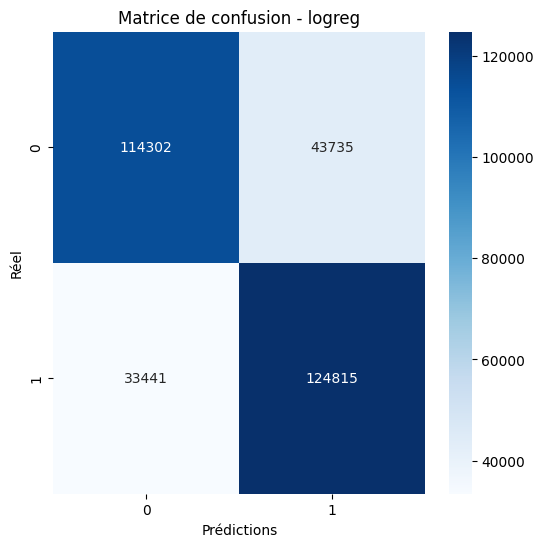


üìä R√©sultats pour : rf
              precision    recall  f1-score   support

           0       0.73      0.74      0.73    158037
           1       0.74      0.72      0.73    158256

    accuracy                           0.73    316293
   macro avg       0.73      0.73      0.73    316293
weighted avg       0.73      0.73      0.73    316293



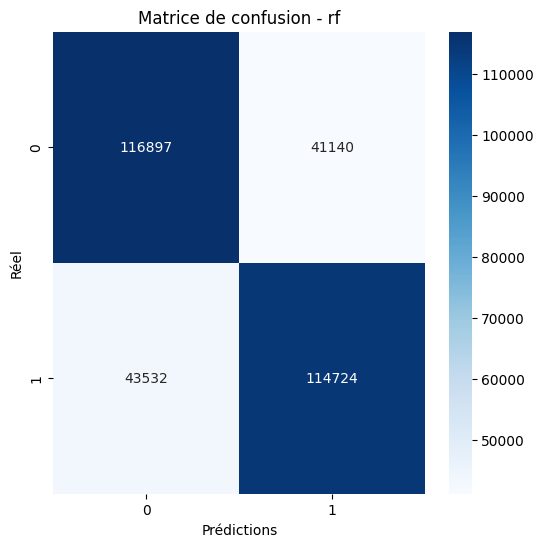

9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 1ms/step

üìä R√©sultats pour : lstm
              precision    recall  f1-score   support

           0       0.77      0.79      0.78    158037
           1       0.78      0.76      0.77    158256

    accuracy                           0.78    316293
   macro avg       0.78      0.78      0.78    316293
weighted avg       0.78      0.78      0.78    316293



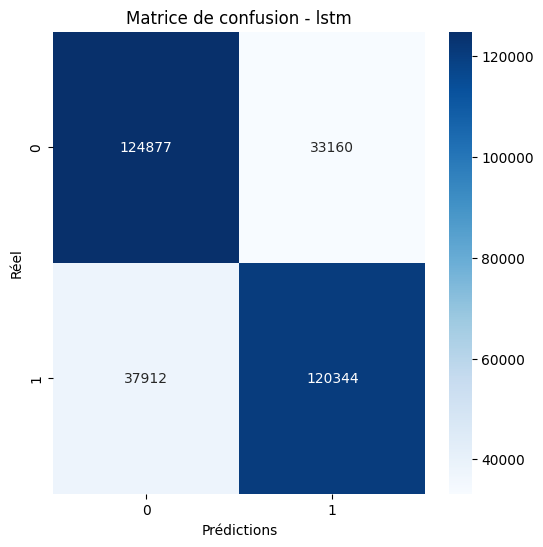


üìä R√©sultats pour : lgbm
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1505
           1       0.71      0.72      0.72      1495

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



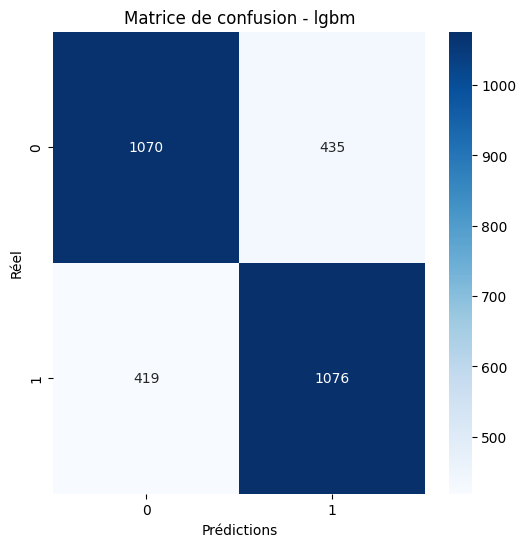


üìä Comparaison finale des mod√®les :


Mod√®le  Accuracy  F1-score
0                logreg    0.7560    0.7638
1                    rf    0.7323    0.7304
2                  lstm    0.7753    0.7720
3                  lgbm    0.7153    0.7159
4  DistilBERT fine-tun√©    0.8423    0.8427

üèÉ View run crawling-rat-435 at: http://127.0.0.1:5000/#/experiments/2/runs/a3cc2d3bc5764a9e83b3ee74a83d2f6f
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


In [28]:
df_results = ev.get_all_model_scores(models_dict, datasets_dict)

# 9 - Tracking MLFlow

In [29]:
y_pred = log_reg_model.predict(X_tfidf_test)
with mlflow.start_run(run_name="Logistic Regression final metrics"):
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

üèÉ View run Logistic Regression final metrics at: http://127.0.0.1:5000/#/experiments/2/runs/610d0fe0f11d49ef82538bdb50eb3633
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2


In [30]:
if mlflow.active_run() is not None:
    mlflow.end_run()

In [31]:
with mlflow.start_run():
    # entra√Ænement mod√®le, log params & metrics
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

üèÉ View run popular-ray-295 at: http://127.0.0.1:5000/#/experiments/2/runs/8cc44ca8f49b495391cf1e0a4a28b44a
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2


# A d√©sactiver en production

In [32]:
utils.launch_mlflow_ui()

üöÄ MLFlow UI lanc√© sur http://127.0.0.1:5000


In [33]:
# mlflow.end_run()  # Pour stopper tout run en cours
